 <div style="font-size: 34px"> 
<font color='blue'> <b>Anime Recommender System Project 2024 competition</b></font>

## **Table of Contents**
1.  [ **Project Overview**](#chapter1)
    *  [**1.1 Background**](#section1_1)
    *  [**1.2 Aim**](#section1_1)
    *  [**1.3 Objectives**](#section1_2)
2.  [ **Importing Packages**](#chapter2)
3.  [ **Data Preprocessing**](#chapter3)
4.  [ **Data Cleaning**](#chapter4)
5.  [ **Exploratory data Analysis (EDA)**](#chapter5)
6.  [ **Modelling**](#chapter6)
7.  [ **Conclusions**](#chapter7)
8.  [ **Insights and Recommendations**](#chapter8)

***

## **1.Project Overview**<a id="chapter1"><a>

# 1.1 Background

The anime industry has experienced substantial growth over the past few decades, with a significant increase in global popularity. Streaming platforms, online communities, and dedicated anime websites have made anime more accessible than ever. Despite the abundance of available content, finding the right anime that matches individual preferences can be challenging due to the sheer volume and diversity of available titles

Traditional recommendation methods, such as popular lists or genre-based suggestions, often fall short in providing personalized recommendations tailored to individual tastes. This gap presents an opportunity to leverage advanced machine learning and data analysis techniques to create a more personalized and satisfying user experience.

#### **1.2. Aim**<a id="section1_1"><a>

The aim of this project is to design an anime movie recommender app that provides personalized suggestions to users based on their preferences and behavior. This enhances the user experience by providing personalized and relevant anime content, which increases engagement, boosts satisfaction, and encourages users to explore anime movies they are likely to enjoy.

#### **1.3 Objectives**<a id="section1_2"><a>

* Provide users with tailored anime suggestions based on their viewing history, preferences, and ratings.
* Enhance user engagement and satisfaction by delivering relevant content that aligns with their interests.
* Leverage data analytics and machine learning algorithms to accurately predict and recommend anime that users are likely to enjoy.
* Design a user-friendly and easy-to-use interface that helps users quickly find and explore their recommendations.

***

## **2. Importing Packages** <a id="chapter2"><a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import re
from html import unescape
import html

***

## **3. Data Preprocessing** <a id="chapter3"><a>


#### 3.1. Data Overview <a class="anchor" id="dataset"></a>

This dataset contains information on anime content (movies, television series, music, specials, OVA, and ONA*), split between a file related to the titles (anime.csv) and one related to user ratings of the titles (training.csv). The test.csv file will be used to create the rating predictions and must be submitted for grading. The submissions.csv file illustrates the expected format of submissions.


#### 3.2. Data Loading <a class="anchor" id="data preprocessing"></a>



In [3]:
# Reading the anime.csv file into a DataFrame
anime_df = pd.read_csv('anime.csv')
print(anime_df.head(3))

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   

   members  
0   200630  
1   793665  
2   114262  


In [4]:
# Reading the train.zip (csv) file into a DataFrame
train_df = pd.read_csv('train.zip')
print(train_df.head(3))

   user_id  anime_id  rating
0        1     11617      10
1        1     11757      10
2        1     15451      10


In [5]:
# Reading the test.csv file into a DataFrame
test_df = pd.read_csv('test.csv')
print(test_df.head(3))

   user_id  anime_id
0    40763     21405
1    68791     10504
2    40487      1281


#### 3.4. Exploring the Dataset

In this section, we explore the dataset to understand its structure and the information it contains. The code snippets below provide an overview of the dataset's shape, the number of columns, and metadata information about the dataset.

In [6]:
# shape of the dataset
print(anime_df.shape)

# information about metadata
anime_df.info()

(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [7]:
# shape of the dataset
print(train_df.shape)

# information about metadata
train_df.info()

(5703554, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703554 entries, 0 to 5703553
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 130.5 MB


In [8]:
# shape of the dataset
print(test_df.shape)

# information about metadata
test_df.info()

(633686, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   633686 non-null  int64
 1   anime_id  633686 non-null  int64
dtypes: int64(2)
memory usage: 9.7 MB


***

## **4. Data Cleaning**<a id="chapter4"><a> 

#### 4.1. Missing values <a class="anchor" id="dataset"></a>

In [9]:
# Check for missing values
print("Missing values in anime_df:")
print(anime_df.isnull().sum())
print("\nMissing values in train_df:")
print(train_df.isnull().sum())
print("\nMissing values in test_df:")
print(test_df.isnull().sum())

Missing values in anime_df:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Missing values in train_df:
user_id     0
anime_id    0
rating      0
dtype: int64

Missing values in test_df:
user_id     0
anime_id    0
dtype: int64


#### 4.2. Drop Duplicates <a class="anchor" id="dataset"></a>

In [10]:
# Remove duplicates if any
anime_df.drop_duplicates(inplace=True)
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

#### 4.3. Cleaning anime_df <a class="anchor" id="dataset"></a>

In [11]:
# Define a function to clean anime_df
def clean_anime_df(df):
    # Ensure anime_id is unique and non-null
    assert df['anime_id'].is_unique, "anime_id column has duplicate values."
    assert df['anime_id'].notnull().all(), "anime_id column has null values."
    df['anime_id'] = df['anime_id'].astype(int)

    # Function to clean names and unescape HTML entities
    def clean_name(name):
        name = unescape(name)  # Convert HTML entities to characters
        name = name.lower().strip()  # Convert to lowercase and strip whitespace
        # Replace specific known HTML entities and problematic characters
        name = name.replace("&#039;", "'").replace("°", "")
        # Remove any other unwanted special characters but allow meaningful ones
        name = re.sub(r'[^a-zA-Z0-9\s\.\,\-\&\:\;\']', '', name)
        return name

    # Apply the cleaning function to the 'name' column
    df['name'] = df['name'].apply(clean_name)

    # Handle missing values in 'genre' and split into lists
    df['genre'] = df['genre'].fillna('')
    df['genre'] = df['genre'].apply(lambda x: x.split(', '))

    # Function to standardize genre lists
    def standardize_genres(genres):
        return [genre.strip().lower() for genre in genres]

    # Apply the function to genre_list column
    df['genre'] = df['genre'].apply(standardize_genres)

    # Standardize the 'type' column
    df['type'] = df['type'].str.lower().str.strip().fillna('unknown')

    # Ensure episodes is numeric and handle missing values
    df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce').fillna(-1).astype(int)

    # Ensure rating is numeric (should remain float) and handle missing values
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(-1.0)

    # Ensure members is numeric and handle missing values
    df['members'] = pd.to_numeric(df['members'], errors='coerce').fillna(0).astype(int)

    return df

In [12]:
# Clean the dataframes
anime_df = clean_anime_df(anime_df)

# Display the first few rows of the cleaned dataframes for verification
print(f'Cleaned anime_df:\n{anime_df.head()}')

Cleaned anime_df:
   anime_id                              name  \
0     32281                    kimi no na wa.   
1      5114  fullmetal alchemist: brotherhood   
2     28977                           gintama   
3      9253                       steins;gate   
4      9969                          gintama'   

                                               genre   type  episodes  rating  \
0             [drama, romance, school, supernatural]  movie         1    9.37   
1  [action, adventure, drama, fantasy, magic, mil...     tv        64    9.26   
2  [action, comedy, historical, parody, samurai, ...     tv        51    9.25   
3                                 [sci-fi, thriller]     tv        24    9.17   
4  [action, comedy, historical, parody, samurai, ...     tv        51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


#### 4.4. Cleaning train data <a class="anchor" id="dataset"></a>

In [13]:
# Define function to clean train_df
def clean_train_df(df):
    # Ensure user_id and anime_id are non-null and numeric
    df = df.dropna(subset=['user_id', 'anime_id'])
    df['user_id'] = pd.to_numeric(df['user_id'], errors='coerce')
    df['anime_id'] = pd.to_numeric(df['anime_id'], errors='coerce')
    
    # Handle ratings: ensure they are integers and within a valid range
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    
    # Option 1: Filter out rows where rating is -1, ensuring rating remains an integer
    df = df[df['rating'] != -1]
    
    # Remove remaining rows with NaN values that could not be converted
    df.dropna(subset=['user_id', 'anime_id', 'rating'], inplace=True)

    # Ensure the remaining ratings are within the valid range
    df = df[(df['rating'] >= 1) & (df['rating'] <= 10)]
    df['rating'] = df['rating'].astype(int)  # Ensure rating column is of integer type

    return df

In [14]:
# Clean the dataframes
train_df = clean_train_df(train_df)

# Display the first few rows of the cleaned dataframes for verification
print(f'Cleaned train_df:\n{train_df.head()}')

Cleaned train_df:
   user_id  anime_id  rating
0        1     11617      10
1        1     11757      10
2        1     15451      10
3        2     11771      10
4        3        20       8


#### 4.5. Cleaning test data <a class="anchor" id="dataset"></a>

In [15]:
# Define function to clean test_df
def clean_test_df(df):
    # Ensure user_id and anime_id are non-null and numeric
    df = df.dropna(subset=['user_id', 'anime_id'])
    df['user_id'] = pd.to_numeric(df['user_id'], errors='coerce')
    df['anime_id'] = pd.to_numeric(df['anime_id'], errors='coerce')
    
    # Remove rows with NaN values that could not be converted
    df.dropna(subset=['user_id', 'anime_id'], inplace=True)
    
    return df


In [16]:
# Clean the dataframes
test_df = clean_test_df(test_df)

# Display the first few rows of the cleaned dataframes for verification
print(f'Cleaned test_df:\n{test_df.head()}')

Cleaned test_df:
   user_id  anime_id
0    40763     21405
1    68791     10504
2    40487      1281
3    55290       165
4    72323     11111


***

## **5. Exploratoty Data Analysis** <a id="chapter5"><a>

Exploratory Data Analysis (EDA) is an important step before building any machine learning model, including a recommender system. We will conduct EDA on the anime_df and train_df datasets to understand the distribution of anime characteristics, user ratings, and other relevant insights.

#### 5.1 EDA on anime_df
- Summary Statistics: Get an overview of the dataset.
- Distribution of Anime Types: Analyze the types of anime (e.g., TV, Movie, OVA).
- Distribution of Genres: Analyze the genres and their frequency.
- Rating Distribution: Visualize the distribution of anime ratings.
- Members Distribution: Analyze the distribution of the number of members who have rated the anime.

In [17]:
# Summary statistics for anime_df
print("Summary statistics for anime_df:")
print(anime_df.describe())

Summary statistics for anime_df:
           anime_id      episodes        rating       members
count  12294.000000  12294.000000  12294.000000  1.229400e+04
mean   14058.221653     12.012445      6.334078  1.807134e+04
std    11455.294701     46.264788      1.435287  5.482068e+04
min        1.000000     -1.000000     -1.000000  5.000000e+00
25%     3484.250000      1.000000      5.820000  2.250000e+02
50%    10260.500000      2.000000      6.550000  1.550000e+03
75%    24794.500000     12.000000      7.170000  9.437000e+03
max    34527.000000   1818.000000     10.000000  1.013917e+06


#### 5.2. Distribution of Ratings

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


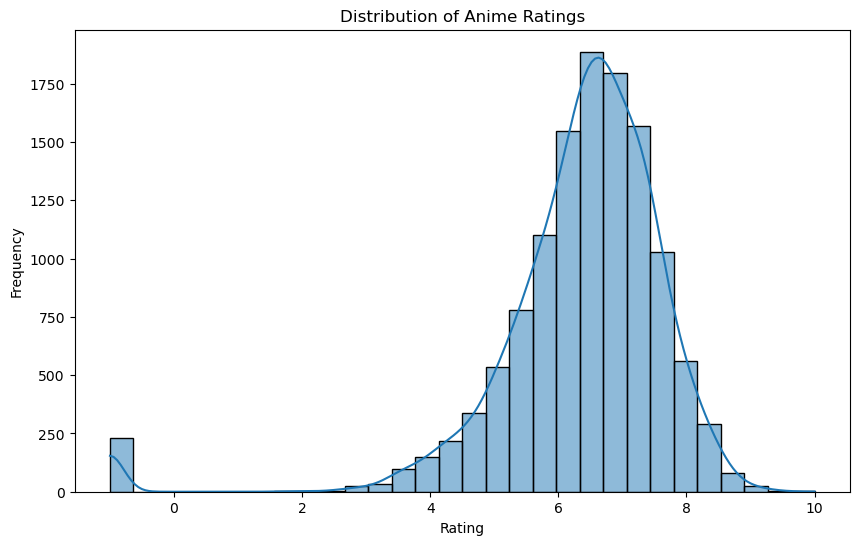

In [18]:
# Distribution of anime ratings
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['rating'], bins=30, kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

- Normal Distribution: The ratings appear to follow a roughly normal distribution with a slight right skew.
- Common Ratings: Most animes are rated between 6 and 8, indicating above-average quality.
- Frequency Drop: There is a noticeable drop in frequency for ratings below 4 and above 8, suggesting extreme ratings are rare.
- Mode Range: The peak of the distribution is between 7 and 8, making this the most common rating range.

#### 5.3. Distribution of Number of Members

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


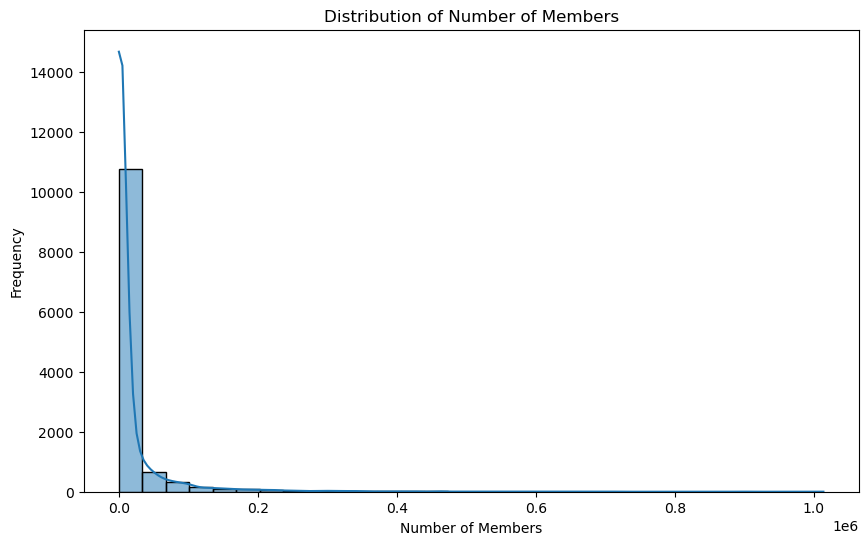

In [19]:
# Distribution of number of members
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['members'], bins=30, kde=True)
plt.title('Distribution of Number of Members')
plt.xlabel('Number of Members')
plt.ylabel('Frequency')
plt.show()

- Skewed Distribution: The data is heavily skewed towards the lower end, indicating that most groups have a small number of members.
- High Frequency at Low Values: There is a high frequency of groups with very few members, suggesting that small groups are common.
- Sharp Decline: The frequency drops sharply as the number of members increases, with very few groups having a large number of members.
- Potential Outliers: The few instances with a high number of members could be outliers or special cases worth investigating further.

#### 5.4. Rating by Anime Type

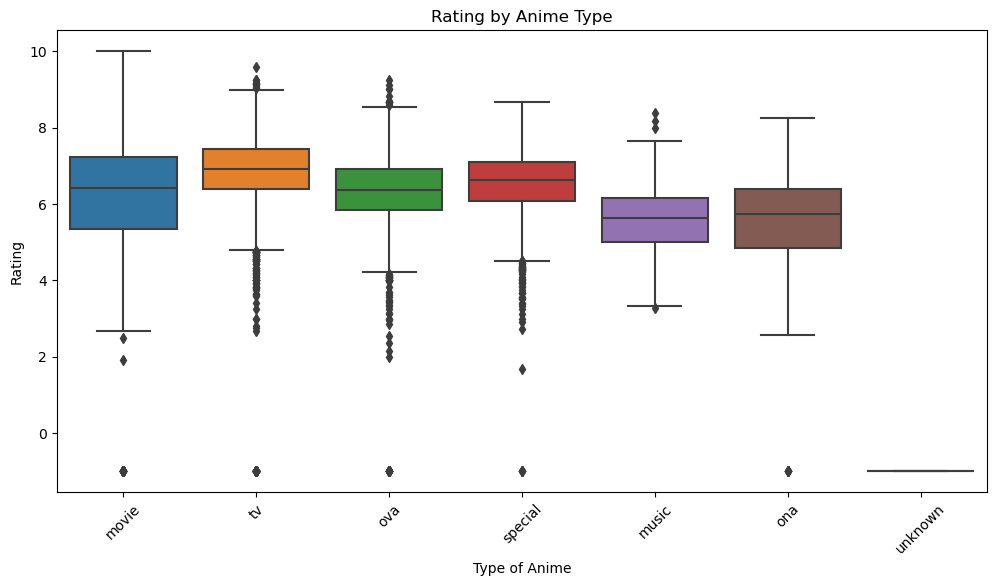

In [20]:
# Average rating by anime type
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='rating', data=anime_df)
plt.title('Rating by Anime Type')
plt.xlabel('Type of Anime')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

- Varied Ratings for TV Anime: The ‘TV’ category has the widest interquartile range (IQR), indicating a more varied distribution of ratings compared to other types.
- Lower Ratings for Music Anime: The ‘Music’ category has the lowest median rating and several low-rating outliers, suggesting that music-type anime generally receive lower ratings.

#### 5.5. Top 10 Most Popular Anime

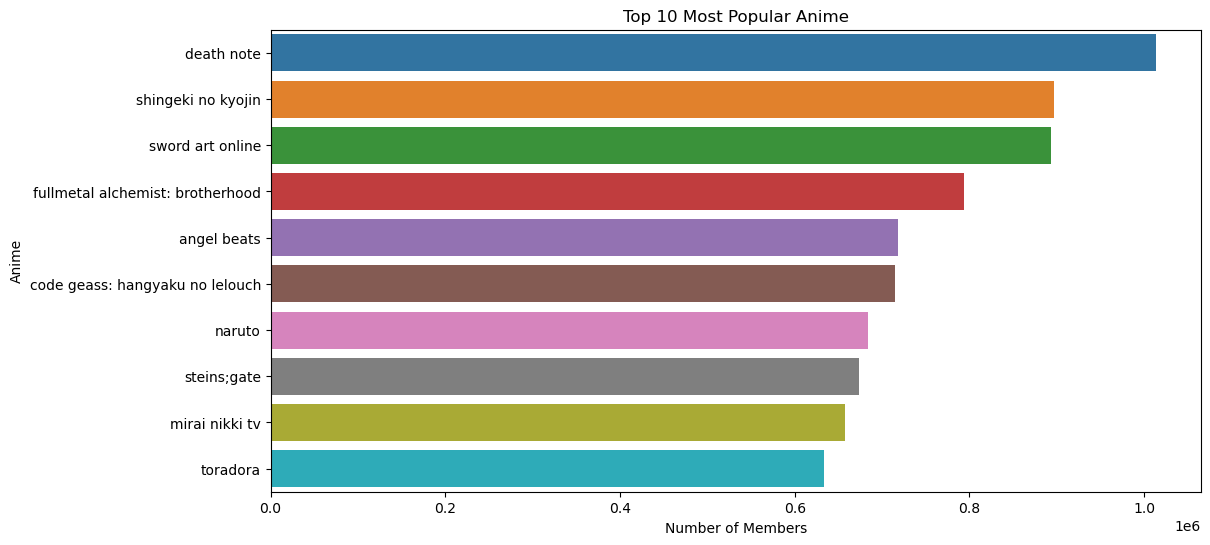

In [21]:
# Top 10 most popular anime
top_10_anime = anime_df.sort_values(by='members', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='members', y='name', data=top_10_anime)
plt.title('Top 10 Most Popular Anime')
plt.xlabel('Number of Members')
plt.ylabel('Anime')
plt.show()

- Dominant Popularity: “Death Note” has the highest number of members, significantly ahead of the second most popular anime, indicating its widespread appeal.
- Gradual Decline: There is a gradual decrease in the number of members from the most popular to the least popular within this top 10 list, suggesting a tiered level of popularity.
- Diverse Engagement: Each anime has a unique number of members, indicating varying degrees of audience reach and engagement across different series.

#### 5.6. Correlation Matrix

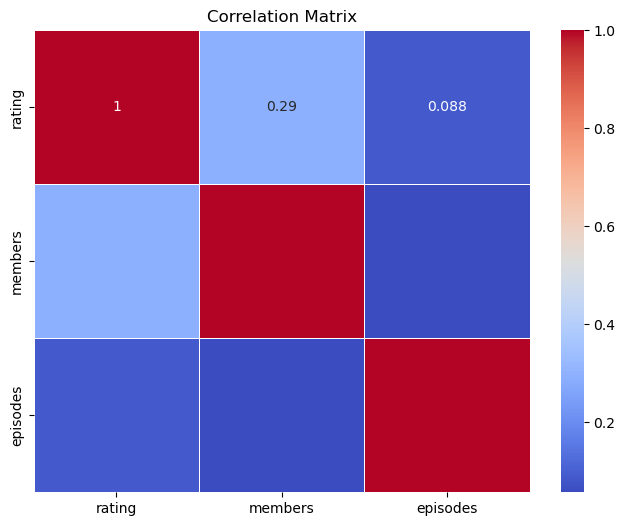

In [22]:
# Correlation matrix
corr_matrix = anime_df[['rating', 'members', 'episodes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- Moderate Positive Correlation: There is a moderate positive correlation (0.29) between ‘rating’ and ‘members,’ suggesting that higher-rated anime tend to have more members.
- Weak Positive Correlation: The correlation between ‘rating’ and ‘episodes’ is very weak (0.088), indicating that the number of episodes has little to no impact on the rating.
- Perfect Correlation: Each variable shows a perfect correlation with itself, as expected, which is represented by the value of 1 along the diagonal.

#### 5.7. User Rating Distribution

Let's look at the distribution of user ratings in train_df.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


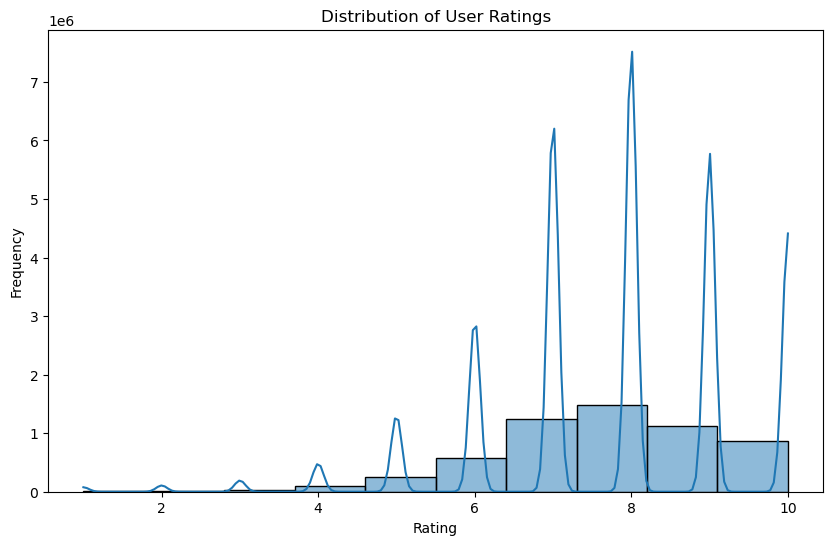

In [23]:
# Distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(train_df['rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


- Non-Uniform Distribution: The ratings are not evenly distributed, with significant spikes at certain rating levels, particularly around 2, 4, and between 8-10.
- High Frequency at High Ratings: The highest frequency spike occurs just below a rating of 10, indicating that users tend to give very high ratings more frequently.
- Local Peaks: There are noticeable local peaks at ratings of approximately 3 and slightly above 6, suggesting some clustering of ratings around these values.

#### 5.8. Top Rated Animes by Users

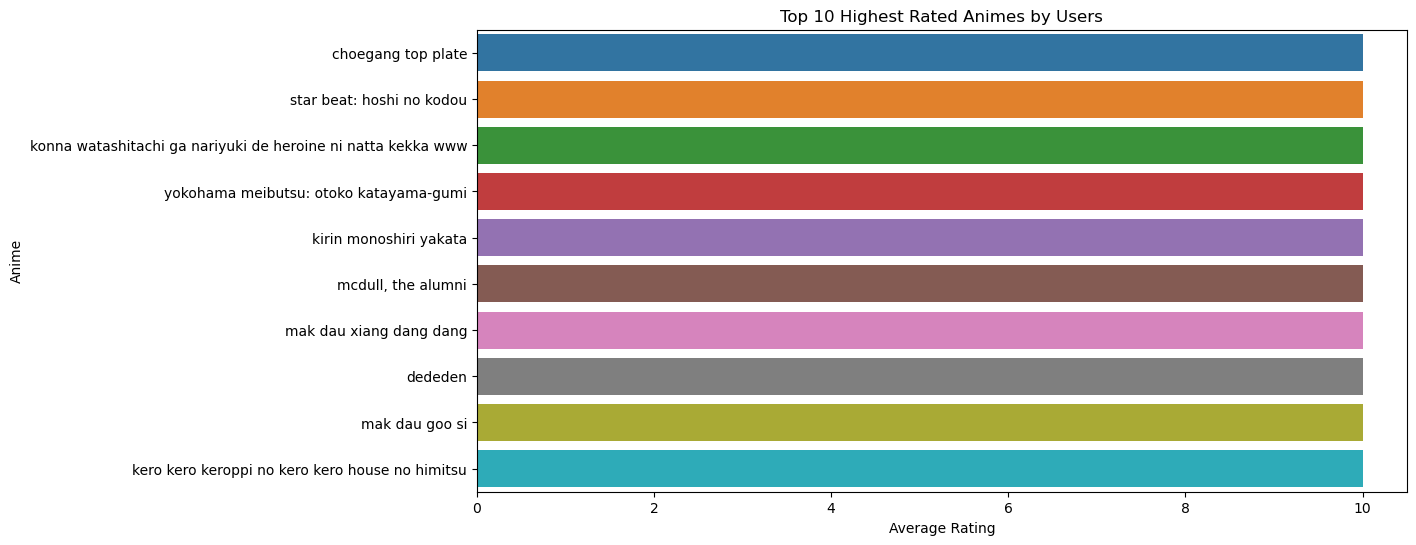

In [24]:
# Top rated animes by users
top_rated_animes = train_df.groupby('anime_id').mean()['rating'].sort_values(ascending=False).head(10).reset_index()
top_rated_animes = top_rated_animes.merge(anime_df[['anime_id', 'name']], on='anime_id')

plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='name', data=top_rated_animes)
plt.title('Top 10 Highest Rated Animes by Users')
plt.xlabel('Average Rating')
plt.ylabel('Anime')
plt.show()

- Top-Rated Anime: “Choegang Top Plate” has the highest average rating, indicating it is the most favored by users.
- Consistent High Ratings: All animes in the top 10 have ratings above 8, showing a high level of user satisfaction across these selections.
- Diverse Titles: The list includes a variety of anime genres and styles, suggesting that high ratings are not limited to a specific type of anime.

***